# Proyecto Valeria y Martín 

Crecimiento del PIB (%Anual) = NY.GDP.MKTP.KD.ZG

Ahorro bruto (% PIB) = NY.GNS.ICTR.ZS

Inflación, precios al consumidor (%anual)= FP.CPI.TOTL.ZG

Exportaciones de bienes y servicios (%PIB) (NE.EXP.GNFS.ZS)

 Importaciones de bienes y servicios (% PIB) (NE.IMP.GNFS.ZS)
 

 Apertura comercial (AC) = NE.EXP.GNFS.ZS + NE.IMP.GNFS.ZS
 
SE.SEC.ENRR = school enrollment secondary (% gross)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
wb_regions = ['Arab World', 'Caribbean small states',
              'Central Europe and the Baltics', 'Early-demographic dividend',
              'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
              'East Asia & Pacific (IDA & IBRD countries)',
              'Euro area', 'Europe & Central Asia',
              'Europe & Central Asia (excluding high income)',
              'Europe & Central Asia (IDA & IBRD countries)',
              'European Union',
              'Fragile and conflict affected situations',
              'Heavily indebted poor countries (HIPC)',
              'High income',
              'IBRD only',
              'IDA & IBRD total',
              'IDA blend',
              'IDA only',
              'IDA total',
              'Late-demographic dividend',
              'Latin America & Caribbean',
              'Latin America & Caribbean (excluding high income)',
              'Latin America & the Caribbean (IDA & IBRD countries)',
              'Least developed countries',
              'Least developed countries: UN classification',
              'Low & middle income',
              'Low income',
              'Lower middle income',
              'Middle East & North Africa',
              'Middle East & North Africa (excluding high income)',
              'Middle East & North Africa (IDA & IBRD countries)',
              'Middle income',
              'North America',
              'Not classified',
              'OECD members',
              'Other small states',
              'Pacific island small states',
              'Post-demographic dividend',
              'Pre-demographic dividend',
              'Small states',
              'South Asia',
              'South Asia (IDA & IBRD)',
              'Sub-Saharan Africa',
              'Sub-Saharan Africa (excluding high income)',
              'Sub-Saharan Africa (IDA & IBRD countries)',
              'Upper middle income',
              'World']

In [3]:
import wbdata
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [4]:
CrecimientoPIBAnual_raw = wbdata.get_data("NY.GDP.MKTP.KD.ZG") 

In [5]:
AhorrobrutoPIB_raw = wbdata.get_data("NY.GNS.ICTR.ZS") 

In [6]:
Inflacion_raw = wbdata.get_data("FP.CPI.TOTL.ZG") 

In [7]:
Exportaciones_raw = wbdata.get_data("NE.EXP.GNFS.ZS")
Importaciones_raw = wbdata.get_data("NE.IMP.GNFS.ZS")
Gasto_Público_educación_raw = wbdata.get_data("SE.XPD.TOTL.GD.ZS")

In [8]:
CrecimientoPIBAnual_raw = wbdata.get_data('NY.GDP.MKTP.KD.ZG')
CrecimientoPIBAnual = {}
for X in CrecimientoPIBAnual_raw:
    date = X['date']
    country = X['country']['value']
    if date == '2018' and country not in wb_regions:
        try:
            gdp_pc = float(X['value'])
            gdp_pcs[country] = gdp_pc
        except:
            pass

In [9]:
AhorrobrutoPIB_raw = wbdata.get_data('NY.GDP.MKTP.KD.ZG')
AhorrobrutoPIB = {}
for X in AhorrobrutoPIB_raw:
    date = X['date']
    country = X['country']['value']
    if date == '2018' and country not in wb_regions:
        try:
            gdp_pc = float(X['value'])
            gdp_pcs[country] = gdp_pc
        except:
            pass

In [10]:
Inflacion_raw = wbdata.get_data('NY.GDP.MKTP.KD.ZG')
Inflacion = {}
for X in Inflacion_raw:
    date = X['date']
    country = X['country']['value']
    if date == '2018' and country not in wb_regions:
        try:
            gdp_pc = float(X['value'])
            gdp_pcs[country] = gdp_pc
        except:
            pass

In [11]:
Importaciones_raw = wbdata.get_data('NE.IMP.GNFS.ZS')
Importaciones= {}
for X in Importaciones_raw:
    date = X['date']
    country = X['country']['value']
    if date == '2018' and country not in wb_regions:
        try:
            gdp_pc = float(X['value'])
            gdp_pcs[country] = gdp_pc
        except:
            pass

In [12]:
Exportaciones_raw = wbdata.get_data('NE.EXP.GNFS.ZS')
Exportaciones = {}
for X in Exportaciones_raw:
    date = X['date']
    country = X['country']['value']
    if date == '2018' and country not in wb_regions:
        try:
            gdp_pc = float(X['value'])
            gdp_pcs[country] = gdp_pc
        except:
            pass

In [13]:
school_enrollment_secondary_raw = wbdata.get_data('SE.SEC.ENRR')
school_enrollment_secondary = {}
for X in school_enrollment_secondary_raw:
    date = X['date']
    country = X['country']['value']
    if date == '2018' and country not in wb_regions:
        try:
            gdp_pc = float(X['value'])
            gdp_pcs[country] = gdp_pc
        except:
            pass

In [14]:
def wb_clean_year_data(wb_raw, year):
    rv = {}
    for X in wb_raw:
        date = X['date']
        country = X['country']['value']
        if date == year and country not in wb_regions:
            try:
                value = float(X['value'])
                rv[country] = value
            except:
                pass
    return rv

In [15]:
def wb_dict_to_dataframe(dict_clean, nombre_variable, año):
    df = pd.DataFrame({'pais': list(dict_clean.keys()),
                       nombre_variable: list(dict_clean.values()),
                       'año': [año] * len(dict_clean)})
    return df

In [16]:
variables = ['NY.GDP.MKTP.KD.ZG', 
             'NY.GNS.ICTR.ZS', 
             'FP.CPI.TOTL.ZG',
             "SL.UEM.TOTL.ZS", 
             "NE.EXP.GNFS.ZS",
             "NE.IMP.GNFS.ZS", 
             "SE.SEC.ENRR"]

In [17]:
CrecimientoPIBAnual_raw = wbdata.get_data("NY.GDP.MKTP.KD.ZG") 
AhorrobrutoPIB_raw = wbdata.get_data("NY.GNS.ICTR.ZS") 
Inflacion_raw = wbdata.get_data("FP.CPI.TOTL.ZG") 
Exportaciones_raw = wbdata.get_data("NE.EXP.GNFS.ZS")
Importaciones_raw = wbdata.get_data("NE.IMP.GNFS.ZS")
school_enrollment_secondary_raw = wbdata.get_data("SE.SEC.ENRR")

In [18]:
raw_lists = {'pib': CrecimientoPIBAnual_raw,
             'ahorro': AhorrobrutoPIB_raw,
             'inflacion': Inflacion_raw,
             "exportacion" : Exportaciones_raw,
             "Importaciones" : Importaciones_raw,
            "schoolenrollmentsecondary" : school_enrollment_secondary_raw}

In [19]:
for año in range(1990, 2011):
    dfs_año = []
    for k, v in raw_lists.items():
        v_clean = wb_clean_year_data(v, str(año))
        df = wb_dict_to_dataframe(v_clean, k, str(año))
        dfs_año.append(df)
    if año == 1990:
        for i, df in enumerate(dfs_año):
            if i == 0:
                df_año = df.merge(dfs_año[i + 1], on=['pais', 'año'])
            else:
                try:
                    df_año = df_año.merge(dfs_año[i + 1], on=['pais', 'año'])
                except:
                    pass
    else:
        for i, df in enumerate(dfs_año):
            if i == 0:
                df_otros_años = df.merge(dfs_año[i + 1], on=['pais', 'año'])
            else:
                try:
                    df_otros_años = df_otros_años.merge(dfs_año[i + 1], on=['pais', 'año'])
                except:
                    pass
        df_año = df_año.append(df_otros_años, ignore_index=True,)

In [20]:
print (df_año)

                    pais       pib   año     ahorro  inflacion  exportacion  \
0                Algeria  0.800001  1990  23.977718  16.652534    23.443685   
1           Bahamas, The -1.596249  1990  19.034112   4.669319    54.160771   
2                Bahrain  4.437997  1990  36.179577   0.929335   115.555829   
3             Bangladesh  5.622258  1990  23.024412   6.126718     5.908316   
4               Barbados -3.307593  1990  15.753258   3.074573    42.892247   
...                  ...       ...   ...        ...        ...          ...   
1890       United States  2.563767  2010  15.518195   1.640043    12.315058   
1891             Uruguay  7.803410  2010  17.012409   6.698709    26.342995   
1892             Vanuatu  1.629082  2010  20.143342   2.762695    46.626517   
1893       Venezuela, RB -1.488791  2010  31.432955  28.187465    28.530407   
1894  West Bank and Gaza  8.099089  2010   7.266528   3.749157    15.340342   

      Importaciones  schoolenrollmentsecondary  
0 

In [21]:
df_año["año"].unique() 

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010'], dtype=object)

In [22]:
print (df_año ['pais'].value_counts())

Morocco           21
United Kingdom    21
Italy             21
Peru              21
Bulgaria          21
                  ..
Chad               2
Iraq               1
Rwanda             1
Kazakhstan         1
Vietnam            1
Name: pais, Length: 150, dtype: int64


In [23]:
paises_buenos = []
for k, v in dict(df_año["pais"].value_counts()).items():
    if v >=  20:
        paises_buenos.append(k)
    

In [24]:
df_año_sin_malos = df_año.loc[df_año["pais"].isin(paises_buenos)]
print (df_año_sin_malos ['pais'].value_counts())

Morocco           21
Italy             21
Netherlands       21
Finland           21
Korea, Rep.       21
Indonesia         21
Spain             21
Peru              21
United Kingdom    21
Tunisia           21
Norway            21
Malaysia          21
Sweden            21
Bulgaria          21
Mexico            21
France            21
Denmark           20
Romania           20
Costa Rica        20
Germany           20
Portugal          20
Iceland           20
Uruguay           20
Switzerland       20
Malta             20
Bahrain           20
Cyprus            20
Name: pais, dtype: int64


In [25]:
print (df_año_sin_malos)

                pais       pib   año     ahorro  inflacion  exportacion  \
2            Bahrain  4.437997  1990  36.179577   0.929335   115.555829   
6           Bulgaria -9.117377  1990  14.655017  23.800000    33.119192   
14        Costa Rica  3.553063  1990  19.357231  19.046136    34.190268   
15            Cyprus  7.404000  1990  23.096056   4.502055    51.500565   
16           Denmark  1.475244  1990  22.651465   2.641603    36.423155   
...              ...       ...   ...        ...        ...          ...   
1879          Sweden  6.189029  2010  29.170328   1.157988    44.732840   
1880     Switzerland  3.002798  2010  38.973214   0.688233    63.965623   
1886         Tunisia  3.510609  2010  20.540961   3.338980    49.496864   
1889  United Kingdom  1.949521  2010  12.912079   2.492655    28.275071   
1891         Uruguay  7.803410  2010  17.012409   6.698709    26.342995   

      Importaciones  schoolenrollmentsecondary  
2         94.605137                   86.93154  
6

In [26]:
df_año_sin_malos.groupby("pais").mean()

,pib,ahorro,inflacion,exportacion,Importaciones,schoolenrollmentsecondary
pais,,,,,,
Bahrain,5.298655,22.973348,1.116101,80.377109,68.109187,96.944668
Bulgaria,1.289846,15.754119,93.142445,42.514996,47.446466,91.928588
Costa Rica,4.563938,15.623354,13.688173,39.167714,42.898283,66.459150
Cyprus,4.049750,18.082900,3.321718,57.155312,59.794641,90.940263
Denmark,1.648443,24.284817,2.114913,43.002751,37.393390,119.718646
Finland,2.038006,26.038679,1.906696,36.319850,31.207211,116.671339
France,1.749111,22.683104,1.786587,25.192196,24.358612,106.311745
Germany,1.417044,23.830751,1.993801,31.098715,28.500679,102.375892
Iceland,2.541379,15.643331,5.421891,35.172131,36.830010,106.784115


In [27]:
df_año_sin_malos["AC"]= df_año_sin_malos["exportacion"]+df_año_sin_malos["Importaciones"]

In [28]:
df_año_sin_malos.head()

,pais,pib,año,ahorro,inflacion,exportacion,Importaciones,schoolenrollmentsecondary,AC
2,Bahrain,4.437997,1990,36.179577,0.929335,115.555829,94.605137,86.93154,210.160966
6,Bulgaria,-9.117377,1990,14.655017,23.800000,33.119192,36.727869,98.79859,69.847061
14,Costa Rica,3.553063,1990,19.357231,19.046136,34.190268,41.094896,43.48998,75.285164
15,Cyprus,7.404000,1990,23.096056,4.502055,51.500565,57.107644,64.16503,108.608209
16,Denmark,1.475244,1990,22.651465,2.641603,36.423155,30.867040,109.43614,67.290196


In [29]:
df_bueno = df_año_sin_malos.groupby("pais").mean()

In [30]:
df_bueno

,pib,ahorro,inflacion,exportacion,Importaciones,schoolenrollmentsecondary,AC
pais,,,,,,,
Bahrain,5.298655,22.973348,1.116101,80.377109,68.109187,96.944668,148.486296
Bulgaria,1.289846,15.754119,93.142445,42.514996,47.446466,91.928588,89.961462
Costa Rica,4.563938,15.623354,13.688173,39.167714,42.898283,66.459150,82.065997
Cyprus,4.049750,18.082900,3.321718,57.155312,59.794641,90.940263,116.949953
Denmark,1.648443,24.284817,2.114913,43.002751,37.393390,119.718646,80.396141
Finland,2.038006,26.038679,1.906696,36.319850,31.207211,116.671339,67.527061
France,1.749111,22.683104,1.786587,25.192196,24.358612,106.311745,49.550808
Germany,1.417044,23.830751,1.993801,31.098715,28.500679,102.375892,59.599394
Iceland,2.541379,15.643331,5.421891,35.172131,36.830010,106.784115,72.002140


In [31]:
y_binaria = []
for i in range(len(df_bueno)):
    pib = df_bueno["pib"][i]
    if pib >= 4 :
        y_binaria.append(1)
    else:
        y_binaria.append(0)
df_bueno["y_binaria"] = y_binaria

In [32]:
df_bueno

,pib,ahorro,inflacion,exportacion,Importaciones,schoolenrollmentsecondary,AC,y_binaria
pais,,,,,,,,
Bahrain,5.298655,22.973348,1.116101,80.377109,68.109187,96.944668,148.486296,1
Bulgaria,1.289846,15.754119,93.142445,42.514996,47.446466,91.928588,89.961462,0
Costa Rica,4.563938,15.623354,13.688173,39.167714,42.898283,66.459150,82.065997,1
Cyprus,4.049750,18.082900,3.321718,57.155312,59.794641,90.940263,116.949953,1
Denmark,1.648443,24.284817,2.114913,43.002751,37.393390,119.718646,80.396141,0
Finland,2.038006,26.038679,1.906696,36.319850,31.207211,116.671339,67.527061,0
France,1.749111,22.683104,1.786587,25.192196,24.358612,106.311745,49.550808,0
Germany,1.417044,23.830751,1.993801,31.098715,28.500679,102.375892,59.599394,0
Iceland,2.541379,15.643331,5.421891,35.172131,36.830010,106.784115,72.002140,0


In [33]:
df_bueno.describe()

,pib,ahorro,inflacion,exportacion,Importaciones,schoolenrollmentsecondary,AC,y_binaria
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,3.033628,22.923316,24.741768,41.243617,40.311870,93.010111,81.555487,0.333333
std,1.496355,6.119096,75.204595,22.801195,21.232589,20.042376,43.699539,0.480384
min,1.057014,14.866456,1.116101,19.076358,19.136350,44.284228,38.212708,0.000000
25%,1.776270,18.202540,2.254554,25.087842,26.796711,80.158653,54.359191,0.000000
50%,2.541379,21.430963,3.132442,35.172131,32.827484,96.029768,67.527061,0.000000
75%,4.223000,25.887949,8.309523,43.133636,45.108271,106.547930,90.013008,1.000000
max,6.084626,35.356070,386.023032,109.258544,113.720656,124.041433,222.979199,1.000000


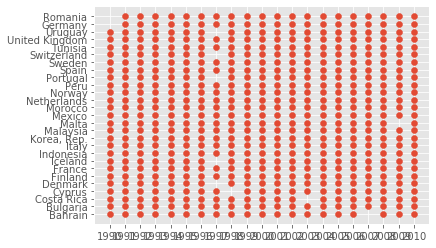

In [33]:
plt.scatter(df_año_sin_malos["año"],df_año_sin_malos["pais"])

Text(0, 0.5, 'inflacion')

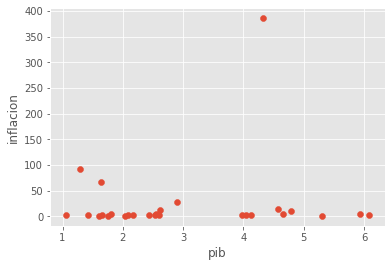

In [34]:
plt.scatter(df_bueno["pib"],df_bueno["inflacion"])
plt.xlabel("pib")  
plt.ylabel("inflacion")

Text(0, 0.5, 'AC')

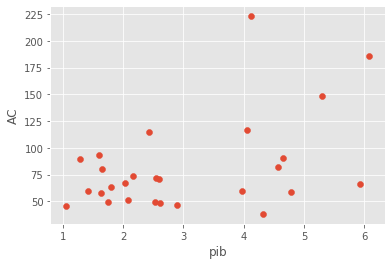

In [35]:
plt.scatter(df_bueno["pib"],df_bueno["AC"])
plt.xlabel("pib")  
plt.ylabel("AC")

Text(0, 0.5, 'schoolenrollmentsecondary')

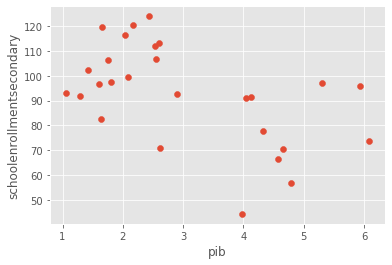

In [36]:
plt.scatter(df_bueno["pib"],df_bueno["schoolenrollmentsecondary"])
plt.xlabel("pib")  
plt.ylabel("schoolenrollmentsecondary")

Text(0, 0.5, 'AC')

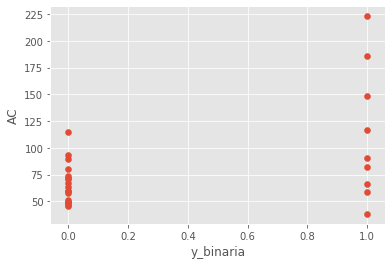

In [37]:
plt.scatter(df_bueno["y_binaria"],df_bueno["AC"])
plt.xlabel("y_binaria")  
plt.ylabel("AC")

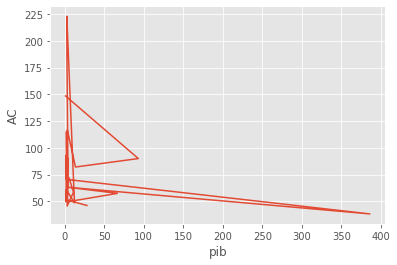

In [38]:
plt.plot(df_bueno["inflacion"], df_bueno["AC"])
plt.xlabel("pib")  
plt.ylabel("AC") 
plt.ioff()

In [43]:
x = df_bueno[["ahorro", "inflacion", "schoolenrollmentsecondary", "AC"]]
y = df_bueno["y_binaria"]

In [44]:
resultados_regresion = sm.Logit(y,x).fit()
print(resultados_regresion.summary())

Optimization terminated successfully.
         Current function value: 0.288870
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              y_binaria   No. Observations:                   27
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 May 2020   Pseudo R-squ.:                  0.5462
Time:                        15:35:00   Log-Likelihood:                -7.7995
converged:                       True   LL-Null:                       -17.186
Covariance Type:            nonrobust   LLR p-value:                 0.0003046
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ahorro                        0.0537      0.087      0.619      0.536      -0.

In [45]:
x = df_bueno[["ahorro", "inflacion", "schoolenrollmentsecondary", "AC"]]
y = df_bueno["y_binaria"]
x = sm.add_constant(x)


In [46]:
resultados_regresion = sm.Logit(y,x).fit()
print(resultados_regresion.summary())

Optimization terminated successfully.
         Current function value: 0.286378
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              y_binaria   No. Observations:                   27
Model:                          Logit   Df Residuals:                       22
Method:                           MLE   Df Model:                            4
Date:                Fri, 22 May 2020   Pseudo R-squ.:                  0.5501
Time:                        15:35:00   Log-Likelihood:                -7.7322
converged:                       True   LL-Null:                       -17.186
Covariance Type:            nonrobust   LLR p-value:                 0.0008196
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.4459      3.959     -0.365      0.715      -9.

In [47]:
Y_hat_ps = resultados_regresion.predict(x)

 ## threshold = .5

In [48]:
suma_correct = 0
suma_y_1 = 0
threshold = .5
for i in range(27):
    true_y =  df_bueno['y_binaria'][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 27)
print(df_bueno['y_binaria'].sum())
print(suma_y_1)

Fitness: 0.9259259259259259
9
9


## __ threshold = success rate

In [49]:
suma_correct = 0
suma_y_1 = 0
threshold = df_bueno['y_binaria'].sum() / 27
for i in range(27):
    true_y = df_bueno['y_binaria'][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 27)
print(df_bueno['y_binaria'].sum())
print(suma_y_1)



Fitness: 0.8518518518518519
9
11


## __ threshold = searched (basic boosting)

In [50]:
success_rates = []
for threshold in np.linspace(0, 1, 100):
    suma_correct = 0
    suma_y_1 = 0
    for i in range(27):
        true_y = df_bueno['y_binaria'][i]
        y_hat_p = Y_hat_ps[i]
        if y_hat_p >= threshold:
            y_hat = 1
        else:
            y_hat = 0
        if true_y == y_hat:
            suma_correct += 1
        suma_y_1 += y_hat
    success_rate = suma_y_1 / 27
    success_rates.append(success_rate)

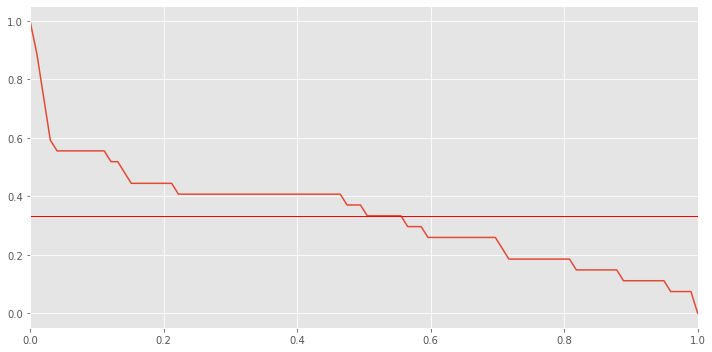


Done!


In [51]:
fig = plt.figure(figsize=(10, 5))
axis = plt.gca()
plt.plot(list(np.linspace(0, 1, 100)), success_rates)
plt.axhline(df_bueno['y_binaria'].sum() / 27, color='red', linewidth=1)
plt.xlim(0, 1)
fig.tight_layout()
plt.show()
plt.close(plt.gcf())
print('\nDone!')


In [52]:
Y_hat_ps = resultados_regresion.predict(x)

In [53]:
print(resultados_regresion.get_margeff(at="mean").summary())
print("Y = ahorro*0.0148+inflacion*0.0027+schoolerollmentsecondary*-0.0153+AC*0.0131")

        Logit Marginal Effects       
Dep. Variable:              y_binaria
Method:                          dydx
At:                              mean
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ahorro                        0.0148      0.020      0.725      0.469      -0.025       0.055
inflacion                     0.0027      0.002      1.489      0.137      -0.001       0.006
schoolenrollmentsecondary    -0.0153      0.007     -2.351      0.019      -0.028      -0.003
AC                            0.0131      0.007      1.892      0.059      -0.000       0.027
Y = ahorro*0.0148+inflacion*0.0027+schoolerollmentsecondary*-0.0153+AC*0.0131


In [54]:
print("APE", resultados_regresion.get_margeff().summary())
print("Y = ahorro*0.0073+inflacion*0.0013+schoolerollmentsecondary*-0.0075+AC*0.0065")
print("Un aumento en una unidad de  schooleollmentsecondary hara una disminusion en el  promedio en 0.0075 en la probabilidad de que el pais tenga un crecimiento en el pib sostenido.  ")

APE         Logit Marginal Effects       
Dep. Variable:              y_binaria
Method:                          dydx
At:                           overall
                               dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ahorro                        0.0073      0.010      0.727      0.467      -0.012       0.027
inflacion                     0.0013      0.001      1.869      0.062   -6.56e-05       0.003
schoolenrollmentsecondary    -0.0075      0.002     -4.425      0.000      -0.011      -0.004
AC                            0.0065      0.002      3.173      0.002       0.002       0.010
Y = ahorro*0.0073+inflacion*0.0013+schoolerollmentsecondary*-0.0075+AC*0.0065
Un aumento en una unidad de  schooleollmentsecondary hara una disminusion en el  promedio en 0.0075 en la probabilidad de que el pais tenga un crecimiento en el pib sostenido.  
